<a href="https://colab.research.google.com/github/Keenandrea/robo-trigger/blob/master/battlebot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datasetting**

---



# **Preprocessing**

---



# **Train & Validate**

---



# **Test**

---



In [0]:
import glob
import pickle
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from music21 import converter, instrument, note, chord, midi, stream
from music21 import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mount Google Drive

---

First things first, we run a cell that will allow us to use our **Google Drive** account to store files that can be used inside the **.ipynb**. Upon execution, this cell will prompt the user to a URL where an authorization code can be copied into the notebook for access. 

In [0]:
from google.colab import drive
# prompt drive authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Dataset

---
The dataset consists of forty-two midi files of my own choice selection, each of which pertaining to the battle-sequence music of several different old-school console games. The games I chose from include *Chrono Trigger*, *Final Fantasy I - X*, *Sonic the Hedgehog I - III*, *Shining Force*, *Vectorman II*, and several of the *Pokemon* games.

Once these forty-two midi files were downloaded, I opened each, one-by-one, into the *MidiEditor* program. Within *MidiEditor*, I began a data-cleansing routine. My routine consisted of three major stages of editing, namely *channels*, *tracks*, and *file duration*. First, I changed every instrument channel within the midi file to Accoustic Grand Piano. Next, I removed any tracks within the file that were either percussive, echoed, or full-fledged discordance. If the midi file had any empty starting measures, I selected all events, and then shifted them to the beginning of the first measure. Furthermore, if the midi file had any empty ending measures, the file duration was trimmed down to the ending of the last eventful measure. 

Finally, I noticed several of the midi files had a bassline track that would repeat the same note or two from beginning to end. This attribute was potentially harming because my preprocessing grabbed all the notes from a select few tracks. If one of those tracks happened to be the bassline, there would be an uneven amount of one or two notes in the dataset, leading the model to predict one note over and over again. So, if I came across one of these repetitive tracks, I removed it. The cleansing of my data did away with a number of outlying factors that may have had either minor or devestating affects on the performance of my model. I believe a the success of model compositions is due largely in fact to this.


In [0]:
from google.colab import files
files.upload()

Saving train_dir.zip to train_dir (4).zip


{'train_dir.zip': b'PK\x03\x04\x14\x00\x00\x00\x08\x00e\x04\xa6NQ\xac0=\x18\x03\x00\x00q\x16\x00\x00$\x00\x00\x00train_dir/piano-a-shot-of-crisis.mid\xed\x98OO\x13A\x18\xc6_X\x10R\x0e\x1e\xf0\xa0\xc6l\xdaK/\x84\xd8\x10IC\xb3!$\x86d\xb3d\xb3\xedfm\xa5\th\xcdVh\x94B\n$x0vm\x02\xd7\xfe9\x13\xbf\x02\xfa\tD\xfd\x1a~\x05\xcf\xde\xd6ggf\x87\xa5\x80\x07\x0b\x01j\x0f\xed\xdb\xe7\xf7\xbc\xd3gf;\x9bN\xd6t\xd6]"\xbaCC4J{\xa6S{\x03\xb5F\xfe\xf3\x91\x91\xe1\xfb\xe3\xe4\xe7\x94;\x0f\xeb\xe4+\x0f\x9e\xae\xd76\xab\x9bq\xa7VY[+\xd72q\xbb\xbcS\xd9)o\'\x12\xe4\x0f\x8d?\xabVK\x1be7v\xf1gg\xf4%)\xf8j\x7fy\x18\xef?\xe87\xf9\x8f\x89\xc7\r\xff$?1\x04K\xb9\xdb\x15B_\x89\x8e\xc6>\xd0Ql\x81\x9a9\x97\x9ayW\xc1\x8b}\xae\xe7\x88\xeayj$\x04\xb8\x17\x82I\xd9\x91\xa7\xa0K\rk\xd3\x06/\xb8\xfb\xaf\xeb6@A\x02Uj\x07\xda\n\x1a\x1c\x00K\x02Uj>\x074\xf0\xac\xa2\x88\x9a\x14\x11\x13\xa2A\xed\x9a\xe4\xbe~\xe5s:X\x15Y*L\xefI\xd3t\xb9k\xa1\x9a\xa8Y\xa6a\x04 \x0bp\xba\x01\x86\xc1\x80\xc6\x0c\x03Ug\x86\xc6\xb8\x1e\xe1r@\xef\x11\x96\

In [0]:
!unzip train_dir.zip

Archive:  train_dir.zip
replace train_dir/piano-a-shot-of-crisis.mid? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train_dir/piano-a-shot-of-crisis.mid  
  inflating: train_dir/piano-battle-five.mid  
  inflating: train_dir/piano-battle-one.mid  
  inflating: train_dir/piano-battle-theme.mid  
  inflating: train_dir/piano-bike-chase.mid  
  inflating: train_dir/piano-bombing-mission.mid  
  inflating: train_dir/piano-boss-battle-one.mid  
  inflating: train_dir/piano-boss-battle-two.mid  
  inflating: train_dir/piano-dr-robotnik-battle.mid  
  inflating: train_dir/piano-ff1-battle.mid  
  inflating: train_dir/piano-ff2-dreadful-battle.mid  
  inflating: train_dir/piano-ff3-battle-theme.mid  
  inflating: train_dir/piano-ff3-kefka-tower.mid  
  inflating: train_dir/piano-ff7-boss-battle.mid  
  inflating: train_dir/piano-ff7-motorcycle.mid  
  inflating: train_dir/piano-ff7-one-winged-angel.mid  
  inflating: train_dir/piano-ff7-one-winged-angel-better-version.mid  
  inflating:

Once the data was detoxified, so to speak, I zipped it into a neatly parceled directory, imported that directory into an *.ipynb*, then unzipped the directory for data preprocessing.

# Data Preprocessing I

---
Our preprocessing stage iterated through the training data of our midi files and returned either individual notes or chord representations in string form. MIT has a prodigious toolkit for computer-aided music theory called *music21*, which we used to both preprocess our data, and postprocess our generative sequences. We used UNIX-style *glob* functionality to grab and loop through each *.mid* file in our training directory, and parse that file by notes and chords. Once the parsing was complete, we appended the parsed notes and chords, in order, to a *notes* variable. The resulting content of *notes* was printed into an array and displayed along with the number of different notes in our dataset, which, in the training case, was 212. This number will be used further on as the number of possible output classes of our model. 

A few modifications were performed on the original code fine-tune the preprocessing. Both before and after blocks are displayed below, respectively, and the modifications employed are briefly discussed as well.

## Before

---
At first, the code that preprocessed our data went as follows:



In [0]:
# data preproccesing code before changes to the code were written 
#   notes = []
#   for i,file in enumerate(glob.glob('/content/drive/My Drive/train_dir/*.mid')):
#     midi = converter.parse(file)
#     print('\r', 'Parsing file ', i, " ",file, end='')
#     notes_to_parse = None
#     try: # file has instrument parts
#       s2 = instrument.partitionByInstrument(midi)
#       notes_to_parse = s2.parts[0].recurse()
#     except: # file has notes in a flat structure
#       notes_to_parse = midi.flat.notes
#     for element in notes_to_parse:
#       if isinstance(element, note.Note):
#         notes.append(str(element.pitch))
#       elif isinstance(element, chord.Chord):
#         notes.append('.'.join(str(n) for n in element.normalOrder))
#   with open('notes', 'wb') as filepath:
#     pickle.dump(notes, filepath)

## After

---

Following our modifications, the final code used went like this:

In [0]:
notes = []
'''place the notes and chords into
   a sequential list to create the
   sequences that will be nn-input'''
for i, file in enumerate(glob.glob('train_dir/*.mid')):
    # convert supported data for
    # mats into music21 objects
    midi = converter.parse(file)
    
    # using the first 
    # five midi tracks
    midi = midi[:5]
    notes_to_parse = None
    notes_to_parse = midi.flat.notes
    print('\r', 'Parsing file ', i, " ",file, end='')
        
    for element in notes_to_parse:
        if isinstance(element, note.Note):
            notes.append(str(element.pitch))
        elif isinstance(element, chord.Chord):
            notes.append('.'.join(str(n) for n in element.normalOrder))
                
print("finished")    
# Get all pitch names
pitches = sorted(set(item for item in notes))
vocab_length = len(pitches)  
number_notes = len(notes)
print(vocab_length)
print(notes)

 Parsing file  41   train_dir/piano-pokemon-wild-pokemon-battle.midfinished
212
['D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', 'D2', 'D2', 'F2', 'D2', 'D2', 'B-2', 'C3', 'D3', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', 'D2', 'D2', 'F2', 'D2', 'D3', 'C3', 'A2', 'G2', 'F2', '9.2', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', '0.4', 'D2', 'D2', 'F2', 'D2', 'D2', 'B-2', 'C3', 'D3', 'F4', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', '2.7', 'D2', 'D2', 'F2', 'D2', 'D3', 'C3', 'A2', 'G2', 'F2', 'A3', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', '0.4', 'D2', 'D2', 'F2', 'D2', 'D2', 'B-2', 'C3', 'D3', 'F4', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', '2.7', 'D2', 'D2', 'F2', 'D2', 'D3', 'C3', 'A2', 'G2', 'F2', 'A4', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', 'D2', 'D2', 'F2', 'D2', 'D2', 'B-2', 'C3', 'D3', 'D2', 'D2', 'F2', 'D2', 'D2', 'F2', 'D2', 'D2', 'D2', 'F2', 'D2', 'D3', 'C3', 'A2', 'G2', 'F2', 'D5', 'D6', 'D2', 'G5', 'A5', 'D2', 'F2', 'C6', 'A5', 'D2', 'C6', 'C5', 'D6', 'G5', 'A5', 'D2', 'G5', 'C6', 'F2'

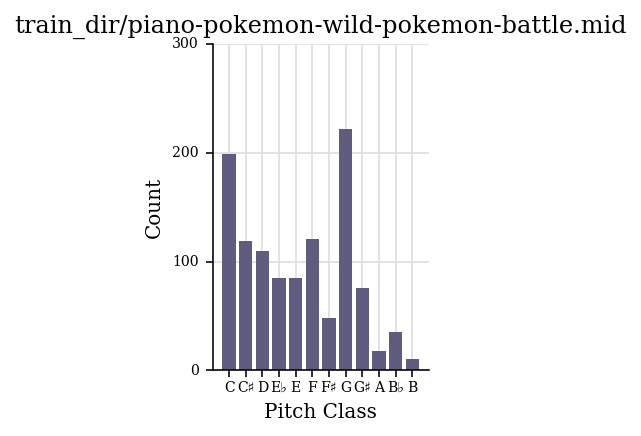

In [0]:
p = graph.plot.HistogramPitchClass(midi, title=file, figureSize=(2,3))
p.id
p.run()

## What Changed?

---

Not much an a whole lot. For starters, the original code grabbed every track from the midi file and parsed it down. Upon further investigation into my midi tracks and their corresponding events, we noticed track 0 through track 5 held the meat and potatoes of the music, that is, the melody, the bass, the chords, and so on, whereas track 6 through to the rest consisted of fillers and noise and events that were not necessarily pivotal to the success of the model. So we placed a range on the tracks: from then on our preprocessing grabbed notes and chords from track 0 through track 5, and abandoned the rest.

How did this play? Well, seemingly profound. Before this little modification, the generated music sounded stochastic, arbitrary, and without rythm nor structure. After the modification the generated music began to conform to a pattern, and, in other words, began to sound more like, well, music.

Other minor modifications were made to this block, as with a quick brushing comparison between to two cells listed above, you will be able to recognize. But none of these had such a profound impact on the generative model as the track limit, so we will leave them out of discussion. 

# Data Preprocessing II

---
The second block of preprocessing code formats the obtained notes into a applicable form for our *LSTM*. Sequences abled to be grouped together to predict the next note are constructed by *one-hot encoding* each of the notes, and then creating an array of sequences. 

First, an index is assigned to each possible note of 212, as mentioned earlier. Out of that, sequences are constructed by taking each note and encoding it into a numpy array with a '1' in the position of the note given. In this particular block, there is one variable that has a determining sway over the generative output of our model. That variable is *sequence_length*. The length of a sequence is how our network makes its prediction of the next note or chord. Our network bases the next sequence output on the previous sequence input, a sort of snake-eating-its-own-tail process that helps the model locate pattern and rythm in its work. Based on our training analytics, I found that the most fitting length for sequences with my provided data was 50. However, that number is not magic. It can be tuned to better suit other datasets and models, and is one of the pivots in successfull generative sequencing.  

A few modifications were performed on the original code fine-tune the preprocessing. Both before and after blocks are displayed below, respectively, and the modifications employed are briefly discussed as well.

## Before

---

Another block of preprocessing code was modified from its original content to aid the model. Here is the original:

In [0]:
# data preproccesing code before changes to the code were written 
# # def prep_sequences(notes, n_vocab):
#   sequence_length = 100
#   # collect all of the pitch names in MIDI data
#   pitchnames = sorted(set(item for item in notes))

#   # create a dictionary that maps pitches to integers
#   note_to_int = dict((note, number) for number, note in 
#                       enumerate(pitchnames))

#   network_input = []
#   network_output = []

#   # create input sequences and corresponding outputs
#   for i in range(0, len(notes) - sequence_length, 1):
#     # to predict the next note in the sequence
#     # the network has the previous sequence_le
#     # ngth notes to acclimatize its prediction
#     sequence_in = notes[i:i + sequence_length] 
#     sequence_out = notes[i + sequence_length] 
#     # map pitches of sequence_in to integers
#     network_input.append([note_to_int[char] for char in sequence_in])
#     # map integer of sequence_out to an integer
#     network_output.append(note_to_int[sequence_out])

#   n_patterns = len(network_input)

#   # reshape the input into a format compatible with LSTM layers
#   network_input = np.reshape(network_input, (n_patterns, sequence_length, 1))

#   # normalize input
#   network_input = network_input / float(n_vocab)

#   # categorical encoding, or, one-hot encoding the output
#   network_output = np_utils.to_categorical(network_output)
  
# #   return (network_input, network_output)

## After

---

And here is the modified version we used to preprocess data for our model:

In [0]:
# assign an index to 
# each possible note
note_dict = dict()
for i, note in enumerate(pitches):
    note_dict[note] = i

# construct sequences 
# by taking each note 
# and encoding it int 
# o a numpy array wit
# h a '1' in the posi
# tion of the note th
# e sequence has
sequence_length = 25
# make a numpy array with the number of train
# ing examples, sequence length, and the leng
# th of the one-hot-encoding
num_training = number_notes - sequence_length

input_notes = np.zeros((num_training, sequence_length, vocab_length))
output_notes = np.zeros((num_training, vocab_length))

# i is the training example, j 
# is the sequence note for the 
# specific training example
for i in range(0, num_training):
    input_sequence = notes[i: i+sequence_length]
    output_note = notes[i+sequence_length]
    for j, note in enumerate(input_sequence):
        input_notes[i][j][note_dict[note]] = 1
    output_notes[i][note_dict[output_note]] = 1

## What Changed?

---

Once again, not much. And, this time, not much. One-hot encoding of the sequences was performed differently. Instead of normalizing the input sequence, and then one-hot encoding the output sequence, we decided to one-hot encode the input and output sequences both. This allowed the representation of our data more expressivity. It offers the machine numbered data instead of character data with which to train, which is important when inputting into an *LSTM*. In so doing, we have made the prediction problem a deal easier for our model to solve.

# Model Architecture

---

Our model architecture employs four layer types.


1.   **LSTM:** or, long-short-term memory layer, is an *RNN* layer that takes a sequence as an input, and then returns either sequences, or a matrix.
2.   **Dropout:** a regularization technique consisting of setting a fraction of input units to 0 at each update during training to fight overfitting. The parameter applied to this layer determines the fraction amount.  
3.   **Dense:** or, fully connected neural network layer in which each input node is connected to each output node.
4.   **Activation:** employed to determine the activation function our neural network will use to calculate the output of a node.

For the first LSTM layer, we provide a unique parameter *input_shape* to inform the network of the shape of the training data.

## Loss Function

---

Calculations of loss for each iteration of the training use *categorical_crossentropy* since each output belongs only to a single class, and since we have greater than two classes to work on.

## Optimizer

---

Our network is optimized by *rmsprop*, which normally fits best on *RNNs*, and as *RNNs* are derivative of *LSTMs*, it made sense to employ.



In [0]:
model = Sequential()
model.add(LSTM(512, return_sequences=True, 
               input_shape=(sequence_length, vocab_length)))
model.add(Dropout(0.2))
model.add(LSTM(512, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(vocab_length))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Very little about our model architecture was modified. The original code kept shape. The only performed adjustment was the removal of three layers, namely:

**model.add(LSTM(512))**

**model.add(Dense(256))**

**model.add(Dropout(0.3))**

These three layers were inset, one after the other, following the second *Dropout* layer, and preceding the first *Dense* activation. Apart from the removal of these layers, both *Dropout* functionalities were originally 0.3, and, after some training, sized down to 0.2.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 512)           1484800   
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 212)               108756    
_________________________________________________________________
activation_1 (Activation)    (None, 212)               0         
Total params: 3,692,756
Trainable params: 3,692,756
Non-trainable params: 0
_________________________________________________________________


# Training

---
We perform a train to validate split using *keras.model.fit*'s *validation_split* parameter instantiated  with a 0.2 cut, or 80% to 20% data split between train and validate, in that order. Implemented on top of the training and validation, our model saves after every epoch with *tf.keras.callbacks.ModelCheckpoint*, which saves the model checkpoints with the epoch number and the validation loss into our Google Drive account. 

The model checkpoints are the weights of the model. These weights can be employed to perform predictions as is, or used as the basis for ongoing training.

The only changes from our original model where this block is concerned have been made the the *batch_size* parameter, which, originally set to 64, has been resized to 128.


In [0]:
# def train(model, network_input, network_output):
  filepath = "/content/drive/My Drive/{epoch:02d}-{loss:.4f}.h5"

  checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0,
                               save_best_only=True, mode='min')

  callbacks_list = [checkpoint]

  history = model.fit(input_notes, output_notes, batch_size=128, epochs=50, 
                      validation_split=0.2, callbacks=callbacks_list)

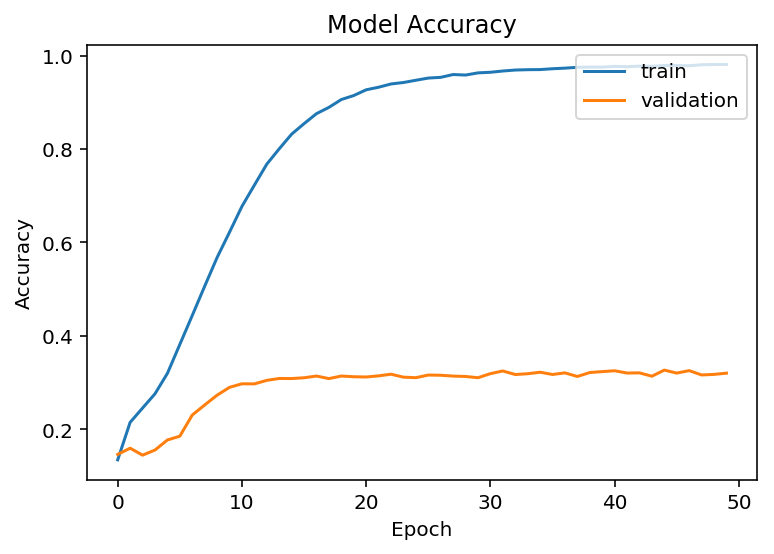

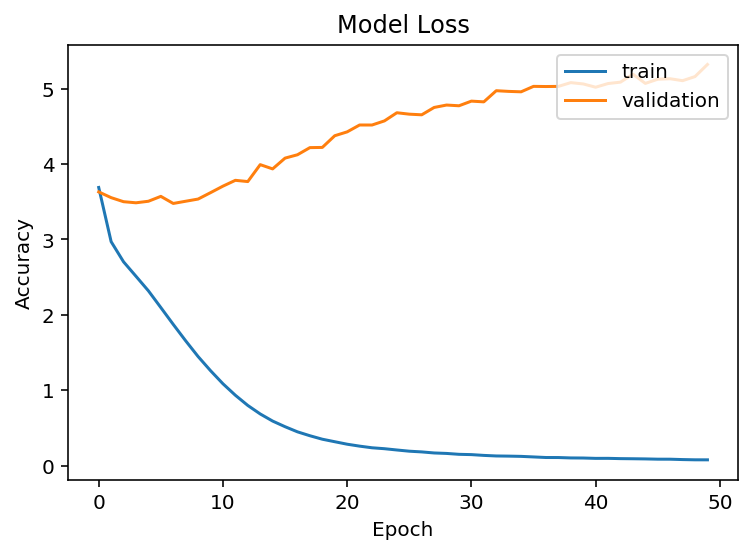

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], 
           loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], 
           loc='upper right')
plt.show()

In [0]:
# Make a dictionary going backwards (with index as key and the note as the value)
backward_dict = dict()
for note in note_dict.keys():
    index = note_dict[note]
    backward_dict[index] = note

# pick a random sequence from the input as a starting point for the prediction
n = np.random.randint(0, len(input_notes)-1)
sequence = input_notes[n]
start_sequence = sequence.reshape(1, sequence_length, vocab_length)
output = []


for i in range(0, 500):
    newNote = model.predict(start_sequence, verbose=0)
    # Get the position with the highest probability
    index = np.argmax(newNote)
    encoded_note = np.zeros((vocab_length))
    encoded_note[index] = 1
    output.append(encoded_note)
    sequence = start_sequence[0][1:]
    start_sequence = np.concatenate((sequence, encoded_note.reshape(1, vocab_length)))
    start_sequence = start_sequence.reshape(1, sequence_length, vocab_length)
    

# Now output is populated with notes in their string form
# for element in output:
#     print(element)

In [0]:
finalNotes = [] 
for element in output:
    index = list(element).index(1)
    finalNotes.append(backward_dict[index])
    
offset = 0
output_notes = []
    
for pattern in finalNotes:
    # if pattern is a chord
    if ('.' in pattern) or pattern.isdigit():
        notes_in_chord = pattern.split('.')
        notes = []
        for current_note in notes_in_chord:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    # if pattern is a note
    else:
        new_note = note.Note(pattern)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)

    # increase offset each iteration so that notes do not stack
    offset += 0.5

midi_stream = stream.Stream(output_notes)
midi_stream.write('midi', fp='/content/drive/My Drive/train_output.mid')

'/content/drive/My Drive/train_output.mid'

# Testing

---



In [0]:
# in case we want previously trained weighting
weights = ""
if(len(weights)>0): model.load_weights(weights)

In [0]:
""" This module generates notes for a midi file using the
    trained neural network """
import pickle
import numpy
from music21 import instrument, note, stream, chord
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation

def generate():
    """ Generate a piano midi file """
    #load the notes used to train the model
    with open('data/notes', 'rb') as filepath:
        notes = pickle.load(filepath)

    # Get all pitch names
    pitchnames = sorted(set(item for item in notes))
    # Get all pitch names
    n_vocab = len(set(notes))

    network_input, normalized_input = prepare_sequences(notes, pitchnames, n_vocab)
    model = create_network(normalized_input, n_vocab)
    prediction_output = generate_notes(model, network_input, pitchnames, n_vocab)
    create_midi(prediction_output)

def prepare_sequences(notes, pitchnames, n_vocab):
    """ Prepare the sequences used by the Neural Network """
    # map between notes and integers and back
    note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

    sequence_length = 100
    network_input = []
    output = []
    for i in range(0, len(notes) - sequence_length, 1):
        sequence_in = notes[i:i + sequence_length]
        sequence_out = notes[i + sequence_length]
        network_input.append([note_to_int[char] for char in sequence_in])
        output.append(note_to_int[sequence_out])

    n_patterns = len(network_input)

    # reshape the input into a format compatible with LSTM layers
    normalized_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
    # normalize input
    normalized_input = normalized_input / float(n_vocab)

    return (network_input, normalized_input)

def create_network(network_input, n_vocab):
    """ create the structure of the neural network """
    model = Sequential()
    model.add(LSTM(
        512,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(512, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(512))
    model.add(Dense(256))
    model.add(Dropout(0.3))
    model.add(Dense(n_vocab))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

    # Load the weights to each node
    model.load_weights('weights.hdf5')

    return model

def generate_notes(model, network_input, pitchnames, n_vocab):
    """ Generate notes from the neural network based on a sequence of notes """
    # pick a random sequence from the input as a starting point for the prediction
    start = numpy.random.randint(0, len(network_input)-1)

    int_to_note = dict((number, note) for number, note in enumerate(pitchnames))

    pattern = network_input[start]
    prediction_output = []

    # generate 500 notes
    for note_index in range(500):
        prediction_input = numpy.reshape(pattern, (1, len(pattern), 1))
        prediction_input = prediction_input / float(n_vocab)

        prediction = model.predict(prediction_input, verbose=0)

        index = numpy.argmax(prediction)
        result = int_to_note[index]
        prediction_output.append(result)

        pattern.append(index)
        pattern = pattern[1:len(pattern)]

    return prediction_output

def create_midi(prediction_output):
    """ convert the output from the prediction to notes and create a midi file
        from the notes """
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                new_note = note.Note(int(current_note))
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 0.5

    midi_stream = stream.Stream(output_notes)

    midi_stream.write('midi', fp='test_output.mid')

if __name__ == '__main__':
    generate()

In [0]:
  notes = []
  '''place the notes and chords into
     a sequential list to create the
     sequences that will be nn-input'''
  for i,file in enumerate(glob.glob('/content/drive/My Drive/train_dir/*.mid')):
    midi = converter.parse(file)
    print('\r', 'Parsing file ', i, " ",file, end='')
    notes_to_parse = None
    try: # file has instrument parts
      s2 = instrument.partitionByInstrument(midi)
      notes_to_parse = s2.parts[0].recurse()
    except: # file has notes in a flat structure
      notes_to_parse = midi.flat.notes
    for element in notes_to_parse:
      if isinstance(element, note.Note):
        notes.append(str(element.pitch))
      elif isinstance(element, chord.Chord):
        notes.append('.'.join(str(n) for n in element.normalOrder))
  with open('notes', 'wb') as filepath:
    pickle.dump(notes, filepath)

 Parsing file  41   /content/drive/My Drive/train_dir/piano-ocean-place.mid

In [0]:
# # count possible outputs
# n_vocab = (len(set(notes)))
# n_vocab

212

In [0]:
# def create_network(network_input, n_vocab):
#     model = Sequential()
#     model.add(LSTM(
#         512,
#         input_shape=(network_input.shape[1], network_input.shape[2]),
#         return_sequences=True))
#     model.add(Dropout(0.2))
#     model.add(LSTM(512, return_sequences=False))
#     model.add(Dropout(0.2))
#     model.add(Dense(n_vocab))
#     model.add(Activation('softmax'))
#     model.compile(loss='categorical_crossentropy', 
#                   optimizer='rmsprop', 
#                   metrics = ['accuracy'])
#     return model

In [0]:
# # Generate network input again
# network_input = []
# output = []
# for i in range(0, len(notes) - sequence_length, 1):
#   sequence_in = notes[i:i + sequence_length]
#   sequence_out = notes[i + sequence_length]
#   network_input.append([note_to_int[char] for char in sequence_in])
#   output.append(note_to_int[sequence_out])
# n_patterns = len(network_input)

In [0]:
# """ Generate notes from the neural network based on a sequence of notes """
# # pick a random sequence from the input as a starting point for the prediction
# start = np.random.randint(0, len(network_input)-1)
# int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
# pattern = network_input[start]
# prediction_output = []
# # generate 500 notes
# for i,note_index in enumerate(range(500)):
#   prediction_input = np.reshape(pattern, (1, len(pattern), 1))
#   prediction_input = prediction_input / float(n_vocab)
#   prediction = model.predict(prediction_input, verbose=0)
#   index = np.argmax(prediction)
#   result = int_to_note[index]
#   print('\r', 'Predicted ', i, " ",result, end='')
#   prediction_output.append(result)
#   pattern.append(index)
#   pattern = pattern[1:len(pattern)]

In [0]:
# offset = 0
# output_notes = []
# # create note and chord objects based on the values generated by the model
# for pattern in prediction_output:
#     # pattern is a chord
#     if ('.' in pattern) or pattern.isdigit():
#         notes_in_chord = pattern.split('.')
#         notes = []
#         for current_note in notes_in_chord:
#             new_note = note.Note(int(current_note))
#             new_note.storedInstrument = instrument.Piano()
#             notes.append(new_note)
#         new_chord = chord.Chord(notes)
#         new_chord.offset = offset
#         output_notes.append(new_chord)
#     # pattern is a note
#     else:
#         new_note = note.Note(pattern)
#         new_note.offset = offset
#         new_note.storedInstrument = instrument.Piano()
#         output_notes.append(new_note)

#     # increase offset each iteration so that notes do not stack
#     offset += 0.5
    
# midi_stream = stream.Stream(output_notes)
# midi_stream.write('midi', fp='/content/drive/My Drive/train_output_ff.mid')

In [0]:
# def train_network():
#   notes = get_notes()
  
#   n_vocab = len(set(notes))
  
#   network_input, network_output = prepare_sequences(notes, n_vocab)
  
#   model = create_network(network_input, n_vocab)
  
#   train(model, network_input, network_output)